# Stock Price Prediction using LSTM
Dataset was collected from Yahoo Finance and the goal is to predict the closing price of the stock for the next trading day using a Long Short Term Memory (LSTM) model.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

import yfinance as yf

In [3]:
start = '2012-01-01'
end = '2024-03-01'

df = yf.download('AAPL', start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433825,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500647,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639426,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771558,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751299,394024400
2012-01-10,15.211071,15.214286,15.053571,15.115714,12.796957,258196400
2012-01-11,15.095714,15.101786,14.975357,15.091071,12.776094,215084800
2012-01-12,15.081429,15.103571,14.955357,15.049643,12.741017,212587200
2012-01-13,14.989286,15.016071,14.952143,14.993214,12.693245,226021600


In [5]:
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-15,183.550003,184.490005,181.350006,183.860001,183.860001,65434500
2024-02-16,183.419998,184.850006,181.669998,182.309998,182.309998,49701400
2024-02-20,181.789993,182.429993,180.000000,181.559998,181.559998,53665600
2024-02-21,181.940002,182.889999,180.660004,182.320007,182.320007,41529700
2024-02-22,183.479996,184.960007,182.460007,184.369995,184.369995,52292200
2024-02-23,185.009995,185.039993,182.229996,182.520004,182.520004,45119700
2024-02-26,182.240005,182.759995,180.649994,181.160004,181.160004,40867400
2024-02-27,181.100006,183.919998,179.559998,182.630005,182.630005,54318900
2024-02-28,182.509995,183.119995,180.130005,181.419998,181.419998,48953900


In [6]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433825,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500647,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639426,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771558,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751299,394024400


In [7]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,14.621429,14.732143,14.607143,14.686786,302220800
1,14.642857,14.810000,14.617143,14.765714,260022000
2,14.819643,14.948214,14.738214,14.929643,271269600
3,14.991786,15.098214,14.972143,15.085714,318292800
4,15.196429,15.276786,15.048214,15.061786,394024400


NB: Web App is predicting the close price

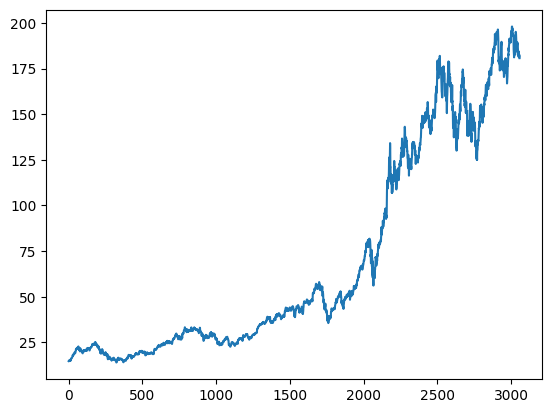

In [8]:
plt .plot(df['Close'])

In [9]:
df

,Open,High,Low,Close,Volume
0,14.621429,14.732143,14.607143,14.686786,302220800
1,14.642857,14.810000,14.617143,14.765714,260022000
2,14.819643,14.948214,14.738214,14.929643,271269600
3,14.991786,15.098214,14.972143,15.085714,318292800
4,15.196429,15.276786,15.048214,15.061786,394024400
...,...,...,...,...,...
3054,185.009995,185.039993,182.229996,182.520004,45119700
3055,182.240005,182.759995,180.649994,181.160004,40867400
3056,181.100006,183.919998,179.559998,182.630005,54318900
3057,182.509995,183.119995,180.130005,181.419998,48953900


Creating the moving averages

In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3054    185.4411
3055    185.5152
3056    185.6175
3057    185.6951
3058    185.7535
Name: Close, Length: 3059, dtype: float64

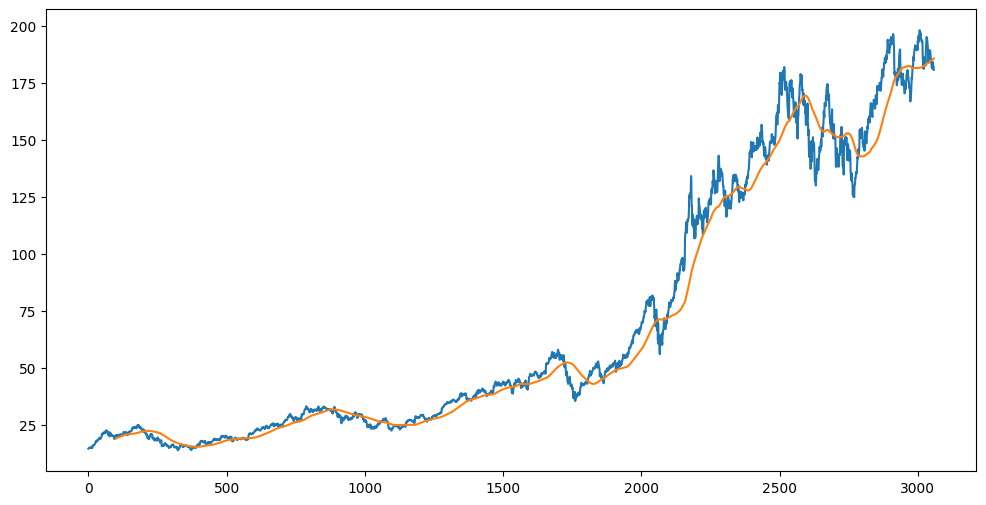

In [11]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100)

In [12]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3054    183.73265
3055    183.77960
3056    183.82495
3057    183.86330
3058    183.90420
Name: Close, Length: 3059, dtype: float64

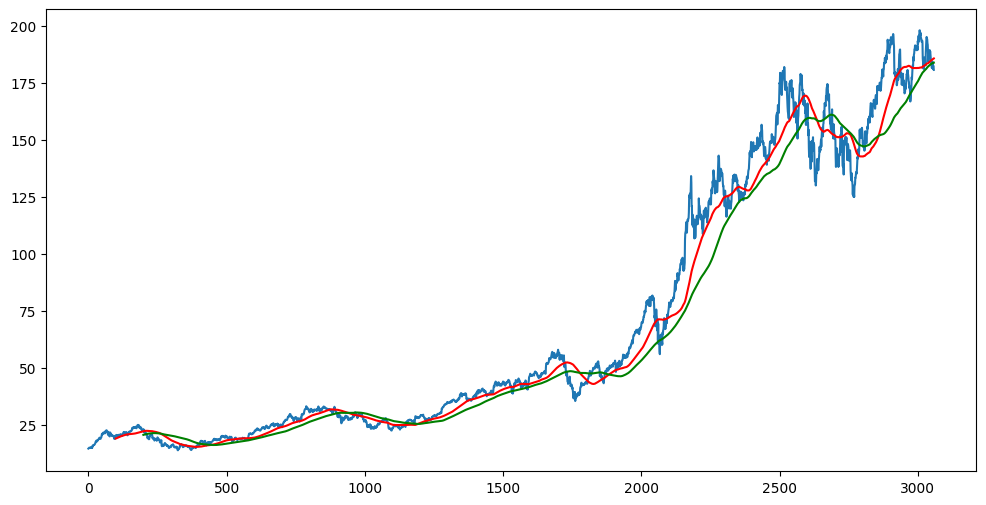

In [13]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [14]:
df.shape

(3059, 5)

In [15]:
# Splitting the data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2141, 1)
(918, 1)


In [16]:
data_training.head()

,Close
0,14.686786
1,14.765714
2,14.929643
3,15.085714
4,15.061786


In [17]:
data_testing.head()

,Close
2141,95.342499
2142,95.752502
2143,95.919998
2144,95.477501
2145,97.057503


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.00929743],
       [0.01029005],
       [0.01235166],
       ...,
       [0.96937678],
       [1.        ],
       [0.99635288]])

In [20]:
data_training_array.shape

(2141, 1)

In [21]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [22]:
x_train.shape

(2041, 100, 1)

Building the ML Model

In [23]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [24]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True,
               input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))

c:\Users\OLAMIDE\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs= 20)

Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 25s 231ms/step - loss: 0.0447
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 195ms/step - loss: 0.0053
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 15s 230ms/step - loss: 0.0046
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 14s 222ms/step - loss: 0.0034
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 194ms/step - loss: 0.0034
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 15s 226ms/step - loss: 0.0035
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 14s 220ms/step - loss: 0.0031
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 14s 222ms/step - loss: 0.0035
Epoch 9/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 192ms/step - loss: 0.0029
Epoch 10/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 14s 221ms/step - loss: 0.0035
Epoch 11/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 14s 224ms/step - loss: 0.0028
Epoch 12/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 14s 215ms/step - loss: 0.0022
Epoch 13/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 14s 222ms/step - loss: 0.0020
Epoch 14/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 196ms/step - loss: 0.0021
Epoch 15/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 15s 

In [27]:
model.save('keras_model_LSTM.h5')

In [28]:
data_testing.head()

,Close
2141,95.342499
2142,95.752502
2143,95.919998
2144,95.477501
2145,97.057503


In [29]:
past_100_days = data_training.tail(100)

In [34]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True, axis=0)

In [35]:
final_df.head()

,Close
0,81.217499
1,81.237503
2,79.750000
3,80.904999
4,80.074997


In [36]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.17691481],
       [0.17705567],
       [0.16658159],
       ...,
       [0.89099938],
       [0.88247926],
       [0.87776154]])

In [37]:
input_data.shape

(1018, 1)

In [38]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [39]:
print(x_test.shape)
print(y_test.shape)

(918, 100, 1)
(918,)


In [40]:
# Making Prediction

y_pred = model.predict(x_test)


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step


In [41]:
y_pred.shape

(918, 1)

In [42]:
y_test

array([0.27637439, 0.27926138, 0.28044078, 0.27732499, 0.28845039,
       0.29315049, 0.28468322, 0.28331016, 0.29760416, 0.28804549,
       0.28996426, 0.25878854, 0.257169  , 0.27262484, 0.26165792,
       0.27424438, 0.28234199, 0.35324874, 0.37210203, 0.37722465,
       0.38002359, 0.40706249, 0.38741707, 0.39878889, 0.37518264,
       0.40077809, 0.41486086, 0.41413911, 0.41202668, 0.41875121,
       0.41977219, 0.43785098, 0.48076824, 0.49124227, 0.48397203,
       0.49592479, 0.48527472, 0.48384884, 0.51365144, 0.54984416,
       0.53026912, 0.45619376, 0.45675709, 0.39944021, 0.43112645,
       0.40415793, 0.39366628, 0.41732534, 0.41859279, 0.39458164,
       0.38197755, 0.3573327 , 0.38014683, 0.3923284 , 0.35930433,
       0.36704985, 0.39563786, 0.41450877, 0.40838275, 0.42049394,
       0.42739452, 0.40084847, 0.42535251, 0.40183431, 0.41535376,
       0.4145792 , 0.42866197, 0.48097947, 0.45774288, 0.45837663,
       0.45499674, 0.44309678, 0.42169102, 0.43246433, 0.42795

In [43]:
y_pred

array([[0.24756983],
       [0.2501026 ],
       [0.2527352 ],
       [0.25554177],
       [0.2585443 ],
       [0.26176062],
       [0.265198  ],
       [0.2687924 ],
       [0.27243364],
       [0.2760622 ],
       [0.27959922],
       [0.28297043],
       [0.2860024 ],
       [0.28851566],
       [0.29043567],
       [0.29172927],
       [0.29244357],
       [0.2926932 ],
       [0.29285997],
       [0.29344988],
       [0.29496926],
       [0.2977743 ],
       [0.30218622],
       [0.3082456 ],
       [0.3158546 ],
       [0.32458183],
       [0.33402133],
       [0.34386915],
       [0.3538279 ],
       [0.3635826 ],
       [0.37287837],
       [0.3815077 ],
       [0.38943553],
       [0.39700207],
       [0.40464613],
       [0.41263333],
       [0.42112705],
       [0.43002748],
       [0.43905988],
       [0.44812122],
       [0.45742032],
       [0.46696287],
       [0.47595263],
       [0.48350132],
       [0.48850954],
       [0.49052984],
       [0.48943335],
       [0.485

In [44]:
scaler.scale_

array([0.00704139])

In [45]:
scale_factor = 1/0.00704139
y_test = y_test * scale_factor
y_pred = y_pred * scale_factor

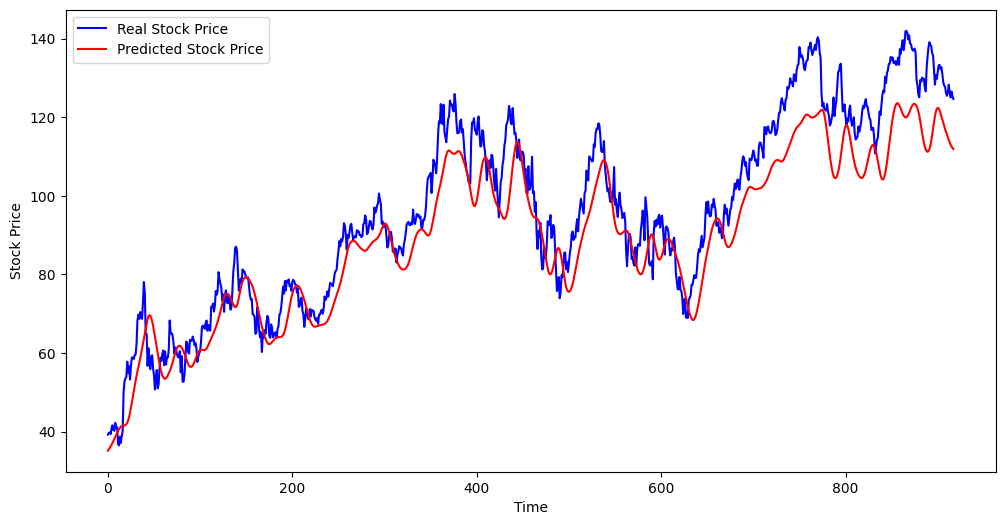

In [46]:
plt.figure(figsize=(12,6))
plt.plot(y_test, color='blue', label='Real Stock Price')
plt.plot(y_pred, color='red', label='Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()